In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
original_df = pd.read_csv("bank.csv", delimiter = ';')
dataframe = original_df

In [3]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
dataframe.shape

(4521, 17)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [7]:
print("check for Duplicated Data",dataframe.duplicated().sum())

check for Duplicated Data 0


In [8]:
dataframe.replace(['yes','no'],[1,0],inplace = True)
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [9]:
dataframe.drop(['marital', 'education','poutcome','day','month'], axis=1,inplace=True)

In [10]:
dataframe = pd.get_dummies(dataframe)
dataframe.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
0,30,0,1787,0,0,79,1,-1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,33,0,4789,1,1,220,1,339,4,0,...,0,0,1,0,0,0,0,1,0,0
2,35,0,1350,1,0,185,1,330,1,0,...,0,0,0,0,0,0,0,1,0,0
3,30,0,1476,1,1,199,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,226,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
dataframe.shape

(4521, 25)

In [12]:
dataframe.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown'],
      dtype='object')

In [13]:
dataframe.replace(np.NaN,dataframe.mean(),inplace= True)
dataframe.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
0,30,0,1787,0,0,79,1,-1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,33,0,4789,1,1,220,1,339,4,0,...,0,0,1,0,0,0,0,1,0,0
2,35,0,1350,1,0,185,1,330,1,0,...,0,0,0,0,0,0,0,1,0,0
3,30,0,1476,1,1,199,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,226,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
dataframe = ((dataframe - dataframe.min())
             /
             (dataframe.max()- dataframe.min()))
dataframe.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
0,0.161765,0.0,0.068455,0.0,0.0,0.024826,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.205882,0.0,0.108750,1.0,1.0,0.071500,0.000000,0.389908,0.16,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.059914,0.000000,0.379587,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.161765,0.0,0.064281,1.0,1.0,0.064548,0.061224,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.588235,0.0,0.044469,1.0,0.0,0.073486,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


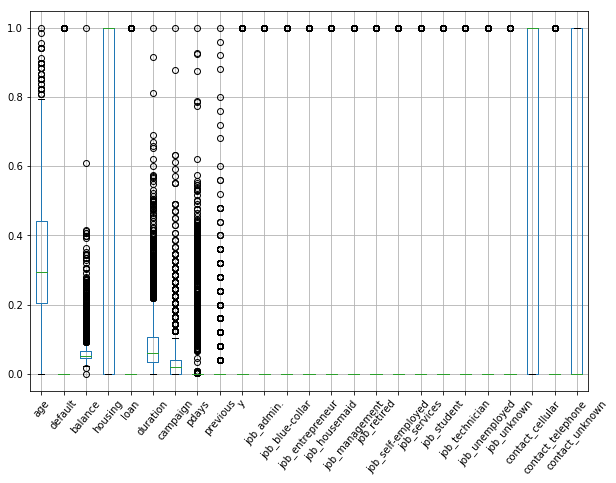

In [15]:
dataframe.boxplot(rot=50, figsize=(10,7))

In [16]:
def Split(data):
    train=int(0.70*len(data))
    test=int(0.30*len(data))
    return train,test

train , test = Split(dataframe)

In [17]:
print("Train data: ",train)
print("Test data: ",test)

Train data:  3164
Test data:  1356


In [18]:
train_data = dataframe.head(train)
test_data = dataframe.tail(test)

# print("Train_data:")
# train_data.head()

# print("test_data:")
# test_data.head()

In [19]:
def seperate(data):
    y = data.y
    data = data.drop('y',axis = 1)
    return data,y
x_train_data,y_train_data = seperate(train_data)
x_test_data, y_test_data = seperate(test_data)

x_train_data = np.array(x_train_data)   
y_train_data = np.array(y_train_data)
x_test_data  = np.array(x_test_data)
y_test_data  = np.array(y_test_data)


In [28]:
y_train_data = y_train_data.reshape(y_train_data.shape[0],1)
y_test_data = y_test_data.reshape(y_test_data.shape[0],1)

print("x_train_data ",x_train_data.shape)
print("y_train_data ",y_train_data.shape)
print("x_test_data ",x_test_data.shape)
print("y_test_data ",y_test_data.shape)

x_train_data  (3164, 24)
y_train_data  (3164, 1)
x_test_data  (1356, 24)
y_test_data  (1356, 1)


In [ ]:
class Single_Layer_NN:
    
    def __init__(self):
        self.learning_rate = 0.0008
        self.epoch = 1000
        
    def gradient_descent(self,x_train_data,y_train_data):
        
        size = len(x_train_data)
#         print(size) (3164,)
        dw = 0.0
        dz = 0.0
        db = 0.0
        nshape = x_train_data.shape[1]
#         print(nshape) (3164, 22)

        w = np.full((nshape,1),0.5)
#         print(w.shape)  (22, 1)
        b = np.ones((1,1) ,dtype='float')
#         print(b)  [[1.]]
        
        for i in range(self.epoch):
            
            z = np.dot(w.T,x_train_data.T) + b
    #         print(z.shape)  (1, 3164)

            a = 1/ 1 + np.exp(-z)
    #         print(a.shape)  (1, 3164)

            dz = a - y_train_data.T
    #       print(dz.shape)  (1, 3164)

            dw = np.dot(dz,x_train_data)/size
#             print(dw.shape)  (1, 22)

            db = 1/size*np.sum(dz, axis =1 ,keepdims=True)
#         print(db.shape)  (1, 1)

            w = w - np.dot(self.learning_rate , dw.T)
            #print(w.shape)
            
            b = b - np.dot(self.learning_rate , db)
#         print(b.shape)

           
      
        return w, b
    
    def prediction(self, w, b, x_test_data):
        
        y_prediction = np.zeros((x_test_data.shape[0], 1),dtype = 'float')
        
#         print(w.shape)  (22, 1)
#         print(x_test_data.shape)  (1356, 22)

        z = np.dot(w.T, x_test_data.T) + b
#         print(z.shape)  (1, 1356)
        
        a = 1/ (1 + np.exp(-z))
#         a = pd.DataFrame(a)
#         print(a[:100])
#         print(a.shape)  (1, 1356)
#         b = a.shape[1]
        
        for i in range(0,a.shape[1]):
            if round(a[0][i],2 )<= 0.5:
                y_prediction[i][0] = 1
            else:
                y_prediction[i][0] = 0
                
        y_prediction = np.reshape(y_prediction, (len(y_prediction), 1))
#         print(y_prediction[:300])    

        return y_prediction

        
def main(dataframe,x_train_data,y_train_data,x_test_data,y_test_data):
    
    obj = Single_Layer_NN()
    
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0],1)),x_train_data))
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0],1)),x_test_data))
#     print(x_test_data.shape)
#     print(x_train_data.shape)
    
    w, b = obj.gradient_descent(x_train_data,y_train_data)
#     print("weight: ",w)
#     print("bias: ",b)

    y_prediction_test = obj.prediction(w, b, x_test_data)
    y_prediction_train = obj.prediction(w, b, x_train_data)
    
#     for i in range(0,300):
#         print(y_prediction[i], y_test_data[i])

    test_accuracy = (100 - np.mean(np.abs(y_prediction_test - y_test_data)) * 100)
    print("Test Accuracy : ",test_accuracy)
    
    
main(dataframe, x_train_data,y_train_data,x_test_data,y_test_data) 
        

/home/ubuntu/anaconda3/envs/testindatavenv/lib/python3.5/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log


()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(